# This Dataset has been taken from UCI data repository.
this predicts the Miles Per gallon based in the certain attributes.


In [41]:
import pandas as pd   

In [42]:
df = pd.read_csv(r"C:\Users\Ramdhan\Desktop\DLCVNLP\TensorFlow\Home Work\MPG_Reg\auto-mpg.data",header=None,delim_whitespace=True,
                 names=['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name'])

In [43]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [44]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [5]:
df['age'] = 82-df['model year']

df['horsepower'] = pd.to_numeric(df.horsepower, errors='coerce').fillna(0)


In [6]:
df = df.drop(labels =['model year','car name'],axis=1)

In [7]:
df1 = df.astype('int64',copy=True)

In [8]:
X= df.iloc[:,1:9] #removed target and car names
y=df['mpg']

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
print(scaler.fit(X))
x=scaler.transform(X)

MinMaxScaler()


In [10]:
x= pd.DataFrame(x)

In [11]:
x

,0,1,2,3,4,5,6
0,1.0,0.617571,0.565217,0.536150,0.238095,0.0,1.0
1,1.0,0.728682,0.717391,0.589736,0.208333,0.0,1.0
2,1.0,0.645995,0.652174,0.516870,0.178571,0.0,1.0
3,1.0,0.609819,0.652174,0.516019,0.238095,0.0,1.0
4,1.0,0.604651,0.608696,0.520556,0.148810,0.0,1.0
...,...,...,...,...,...,...,...
393,0.2,0.186047,0.373913,0.333711,0.452381,0.0,0.0
394,0.2,0.074935,0.226087,0.146583,0.988095,0.5,0.0
395,0.2,0.173127,0.365217,0.193365,0.214286,0.0,0.0
396,0.2,0.134367,0.343478,0.286929,0.630952,0.0,0.0


In [12]:
y.dtypes

dtype('float64')

# Creating NN for MPG regression problem

In [25]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=42)

In [26]:
# normalize all the data points and cast the labels to int64
import tensorflow as tf
train_x, test_x = tf.cast(train_x, tf.float32), tf.cast(test_x, tf.float32)
train_y, test_y = tf.cast(train_y,tf.float32),tf.cast(test_y,tf.float32)

In [27]:
mpgmodel = tf.keras.models.Sequential([
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(7,input_dim=7,activation=tf.nn.relu),  
tf.keras.layers.Dense(343,activation=tf.nn.relu),
tf.keras.layers.Dense(49,activation=tf.nn.relu), 
tf.keras.layers.Dense(1,activation='linear')
])


In [28]:
optimiser = tf.keras.optimizers.Adam()
mpgmodel.compile(optimizer= optimiser, loss='mean_squared_error')

In [29]:
history = mpgmodel.fit(train_x, train_y, batch_size=8, epochs=2000,validation_split=0.2)

Epoch 1/2000
32/32 [==============================] - 0s 15ms/step - loss: 593.4869 - val_loss: 533.6908
Epoch 2/2000
32/32 [==============================] - 0s 7ms/step - loss: 381.1061 - val_loss: 165.3325
Epoch 3/2000
32/32 [==============================] - 0s 7ms/step - loss: 110.6395 - val_loss: 78.2701
Epoch 4/2000
32/32 [==============================] - 0s 7ms/step - loss: 69.2509 - val_loss: 63.9971
Epoch 5/2000
32/32 [==============================] - 0s 6ms/step - loss: 56.1656 - val_loss: 53.6479
Epoch 6/2000
32/32 [==============================] - 0s 7ms/step - loss: 47.3994 - val_loss: 46.6473
Epoch 7/2000
32/32 [==============================] - 0s 7ms/step - loss: 39.9122 - val_loss: 42.3558
Epoch 8/2000
32/32 [==============================] - 0s 7ms/step - loss: 34.4621 - val_loss: 35.1872
Epoch 9/2000
32/32 [==============================] - 0s 6ms/step - loss: 29.6933 - val_loss: 30.4604
Epoch 10/2000
32/32 [==============================] - 0s 7ms/step - loss: 2

32/32 [==============================] - 0s 4ms/step - loss: 8.7728 - val_loss: 8.7459
Epoch 81/2000
32/32 [==============================] - 0s 4ms/step - loss: 8.7120 - val_loss: 8.6101
Epoch 82/2000
32/32 [==============================] - 0s 3ms/step - loss: 8.6669 - val_loss: 9.0700
Epoch 83/2000
32/32 [==============================] - 0s 3ms/step - loss: 8.5145 - val_loss: 9.0338
Epoch 84/2000
32/32 [==============================] - 0s 4ms/step - loss: 8.8753 - val_loss: 8.8707
Epoch 85/2000
32/32 [==============================] - 0s 4ms/step - loss: 9.0983 - val_loss: 8.5213
Epoch 86/2000
32/32 [==============================] - 0s 4ms/step - loss: 8.9225 - val_loss: 8.7540
Epoch 87/2000
32/32 [==============================] - 0s 4ms/step - loss: 8.8155 - val_loss: 8.5781
Epoch 88/2000
32/32 [==============================] - 0s 4ms/step - loss: 8.4323 - val_loss: 8.7698
Epoch 89/2000
32/32 [==============================] - 0s 4ms/step - loss: 8.8706 - val_loss: 8.4980
Epoc

32/32 [==============================] - 0s 4ms/step - loss: 7.7642 - val_loss: 8.0981
Epoch 161/2000
32/32 [==============================] - 0s 3ms/step - loss: 7.6204 - val_loss: 7.9215
Epoch 162/2000
32/32 [==============================] - 0s 4ms/step - loss: 7.9481 - val_loss: 7.6210
Epoch 163/2000
32/32 [==============================] - 0s 3ms/step - loss: 7.9813 - val_loss: 8.0108
Epoch 164/2000
32/32 [==============================] - 0s 3ms/step - loss: 7.5639 - val_loss: 7.7384
Epoch 165/2000
32/32 [==============================] - 0s 4ms/step - loss: 7.6006 - val_loss: 7.5260
Epoch 166/2000
32/32 [==============================] - 0s 4ms/step - loss: 7.5365 - val_loss: 7.3130
Epoch 167/2000
32/32 [==============================] - 0s 3ms/step - loss: 7.6321 - val_loss: 7.6655
Epoch 168/2000
32/32 [==============================] - 0s 3ms/step - loss: 7.4804 - val_loss: 9.5345
Epoch 169/2000
32/32 [==============================] - 0s 3ms/step - loss: 8.0225 - val_loss: 7.

32/32 [==============================] - 0s 5ms/step - loss: 7.2107 - val_loss: 7.5605
Epoch 241/2000
32/32 [==============================] - 0s 4ms/step - loss: 7.2738 - val_loss: 7.7200
Epoch 242/2000
32/32 [==============================] - 0s 5ms/step - loss: 7.1956 - val_loss: 7.4548
Epoch 243/2000
32/32 [==============================] - 0s 4ms/step - loss: 6.9626 - val_loss: 7.3998
Epoch 244/2000
32/32 [==============================] - 0s 4ms/step - loss: 6.7485 - val_loss: 7.9752
Epoch 245/2000
32/32 [==============================] - 0s 4ms/step - loss: 7.0904 - val_loss: 7.8551
Epoch 246/2000
32/32 [==============================] - 0s 4ms/step - loss: 6.9171 - val_loss: 8.1306
Epoch 247/2000
32/32 [==============================] - 0s 4ms/step - loss: 7.0195 - val_loss: 9.0661
Epoch 248/2000
32/32 [==============================] - 0s 4ms/step - loss: 7.2651 - val_loss: 8.1189
Epoch 249/2000
32/32 [==============================] - 0s 4ms/step - loss: 7.0548 - val_loss: 7.

32/32 [==============================] - 0s 4ms/step - loss: 6.7573 - val_loss: 7.9183
Epoch 321/2000
32/32 [==============================] - 0s 4ms/step - loss: 7.1294 - val_loss: 7.9332
Epoch 322/2000
32/32 [==============================] - 0s 4ms/step - loss: 6.9308 - val_loss: 7.4817
Epoch 323/2000
32/32 [==============================] - 0s 4ms/step - loss: 7.1085 - val_loss: 7.6201
Epoch 324/2000
32/32 [==============================] - 0s 4ms/step - loss: 6.6244 - val_loss: 7.3814
Epoch 325/2000
32/32 [==============================] - 0s 4ms/step - loss: 7.0765 - val_loss: 7.6257
Epoch 326/2000
32/32 [==============================] - 0s 4ms/step - loss: 7.0192 - val_loss: 8.6621
Epoch 327/2000
32/32 [==============================] - 0s 6ms/step - loss: 6.8219 - val_loss: 7.5655
Epoch 328/2000
32/32 [==============================] - 0s 5ms/step - loss: 6.9030 - val_loss: 7.4837
Epoch 329/2000
32/32 [==============================] - 0s 6ms/step - loss: 6.8564 - val_loss: 7.

32/32 [==============================] - 0s 4ms/step - loss: 6.8623 - val_loss: 7.9038
Epoch 401/2000
32/32 [==============================] - 0s 4ms/step - loss: 6.9371 - val_loss: 7.5520
Epoch 402/2000
32/32 [==============================] - 0s 3ms/step - loss: 6.5503 - val_loss: 7.6946
Epoch 403/2000
32/32 [==============================] - 0s 3ms/step - loss: 6.7462 - val_loss: 8.0187
Epoch 404/2000
32/32 [==============================] - 0s 3ms/step - loss: 7.0175 - val_loss: 7.5979
Epoch 405/2000
32/32 [==============================] - 0s 3ms/step - loss: 6.5517 - val_loss: 7.7473
Epoch 406/2000
32/32 [==============================] - 0s 4ms/step - loss: 6.5813 - val_loss: 7.7374
Epoch 407/2000
32/32 [==============================] - 0s 3ms/step - loss: 6.6331 - val_loss: 7.5551
Epoch 408/2000
32/32 [==============================] - 0s 3ms/step - loss: 6.7517 - val_loss: 7.7843
Epoch 409/2000
32/32 [==============================] - 0s 3ms/step - loss: 6.5160 - val_loss: 7.

32/32 [==============================] - 0s 3ms/step - loss: 6.8005 - val_loss: 7.2156
Epoch 481/2000
32/32 [==============================] - 0s 3ms/step - loss: 6.4670 - val_loss: 7.9030
Epoch 482/2000
32/32 [==============================] - 0s 3ms/step - loss: 6.4335 - val_loss: 7.2993
Epoch 483/2000
32/32 [==============================] - 0s 3ms/step - loss: 6.8638 - val_loss: 7.1566
Epoch 484/2000
32/32 [==============================] - 0s 4ms/step - loss: 6.6779 - val_loss: 7.7332
Epoch 485/2000
32/32 [==============================] - 0s 4ms/step - loss: 6.7355 - val_loss: 7.7518
Epoch 486/2000
32/32 [==============================] - 0s 3ms/step - loss: 6.5726 - val_loss: 7.5772
Epoch 487/2000
32/32 [==============================] - 0s 4ms/step - loss: 6.4429 - val_loss: 7.6795
Epoch 488/2000
32/32 [==============================] - 0s 3ms/step - loss: 6.3799 - val_loss: 7.2020
Epoch 489/2000
32/32 [==============================] - 0s 3ms/step - loss: 6.3532 - val_loss: 7.

32/32 [==============================] - 0s 5ms/step - loss: 6.5632 - val_loss: 7.3088
Epoch 561/2000
32/32 [==============================] - 0s 5ms/step - loss: 6.3318 - val_loss: 7.9877
Epoch 562/2000
32/32 [==============================] - 0s 4ms/step - loss: 6.2923 - val_loss: 7.7577
Epoch 563/2000
32/32 [==============================] - 0s 4ms/step - loss: 6.6270 - val_loss: 7.7409
Epoch 564/2000
32/32 [==============================] - 0s 4ms/step - loss: 6.5384 - val_loss: 7.3919
Epoch 565/2000
32/32 [==============================] - 0s 4ms/step - loss: 6.8230 - val_loss: 7.3261
Epoch 566/2000
32/32 [==============================] - 0s 4ms/step - loss: 6.7082 - val_loss: 7.2409
Epoch 567/2000
32/32 [==============================] - 0s 4ms/step - loss: 6.1544 - val_loss: 7.0960
Epoch 568/2000
32/32 [==============================] - 0s 4ms/step - loss: 6.9908 - val_loss: 8.2951
Epoch 569/2000
32/32 [==============================] - 0s 4ms/step - loss: 6.2384 - val_loss: 7.

32/32 [==============================] - 0s 4ms/step - loss: 6.3970 - val_loss: 7.6323
Epoch 641/2000
32/32 [==============================] - 0s 3ms/step - loss: 6.6002 - val_loss: 7.1911
Epoch 642/2000
32/32 [==============================] - 0s 3ms/step - loss: 6.2871 - val_loss: 8.2996
Epoch 643/2000
32/32 [==============================] - 0s 3ms/step - loss: 7.3292 - val_loss: 7.6279
Epoch 644/2000
32/32 [==============================] - 0s 4ms/step - loss: 6.0305 - val_loss: 7.5041
Epoch 645/2000
32/32 [==============================] - 0s 3ms/step - loss: 6.2049 - val_loss: 8.1856
Epoch 646/2000
32/32 [==============================] - ETA: 0s - loss: 6.8937 - 0s 4ms/step - loss: 6.2781 - val_loss: 7.0167
Epoch 647/2000
32/32 [==============================] - 0s 3ms/step - loss: 5.9945 - val_loss: 7.4081
Epoch 648/2000
32/32 [==============================] - 0s 3ms/step - loss: 6.4364 - val_loss: 7.0475
Epoch 649/2000
32/32 [==============================] - 0s 4ms/step - lo

32/32 [==============================] - 0s 4ms/step - loss: 5.8207 - val_loss: 6.8070
Epoch 721/2000
32/32 [==============================] - 0s 3ms/step - loss: 6.3258 - val_loss: 7.1028
Epoch 722/2000
32/32 [==============================] - 0s 4ms/step - loss: 6.1489 - val_loss: 7.8578
Epoch 723/2000
32/32 [==============================] - 0s 4ms/step - loss: 6.5989 - val_loss: 7.3181
Epoch 724/2000
32/32 [==============================] - 0s 4ms/step - loss: 6.1668 - val_loss: 7.4952
Epoch 725/2000
32/32 [==============================] - 0s 4ms/step - loss: 5.8425 - val_loss: 7.0126
Epoch 726/2000
32/32 [==============================] - 0s 4ms/step - loss: 6.0237 - val_loss: 7.1959
Epoch 727/2000
32/32 [==============================] - 0s 5ms/step - loss: 6.0797 - val_loss: 6.9723
Epoch 728/2000
32/32 [==============================] - 0s 4ms/step - loss: 6.0450 - val_loss: 7.7922
Epoch 729/2000
32/32 [==============================] - 0s 3ms/step - loss: 6.0860 - val_loss: 6.

32/32 [==============================] - 0s 6ms/step - loss: 6.2131 - val_loss: 7.7509
Epoch 801/2000
32/32 [==============================] - 0s 4ms/step - loss: 6.0119 - val_loss: 6.9652
Epoch 802/2000
32/32 [==============================] - 0s 4ms/step - loss: 5.9133 - val_loss: 7.5580
Epoch 803/2000
32/32 [==============================] - 0s 4ms/step - loss: 6.0144 - val_loss: 6.9840
Epoch 804/2000
32/32 [==============================] - 0s 4ms/step - loss: 5.6484 - val_loss: 6.7947
Epoch 805/2000
32/32 [==============================] - 0s 4ms/step - loss: 6.4422 - val_loss: 9.0440
Epoch 806/2000
32/32 [==============================] - 0s 4ms/step - loss: 6.3732 - val_loss: 7.0065
Epoch 807/2000
32/32 [==============================] - 0s 4ms/step - loss: 5.8531 - val_loss: 7.1720
Epoch 808/2000
32/32 [==============================] - 0s 5ms/step - loss: 5.8361 - val_loss: 6.8281
Epoch 809/2000
32/32 [==============================] - 0s 5ms/step - loss: 5.8533 - val_loss: 6.

32/32 [==============================] - 0s 3ms/step - loss: 5.5861 - val_loss: 6.9619
Epoch 881/2000
32/32 [==============================] - 0s 3ms/step - loss: 5.5387 - val_loss: 7.7040
Epoch 882/2000
32/32 [==============================] - 0s 3ms/step - loss: 5.6181 - val_loss: 6.6182
Epoch 883/2000
32/32 [==============================] - 0s 3ms/step - loss: 5.5553 - val_loss: 6.9908
Epoch 884/2000
32/32 [==============================] - 0s 4ms/step - loss: 5.5874 - val_loss: 6.8404
Epoch 885/2000
32/32 [==============================] - 0s 3ms/step - loss: 5.6150 - val_loss: 6.7722
Epoch 886/2000
32/32 [==============================] - 0s 4ms/step - loss: 5.5114 - val_loss: 6.8929
Epoch 887/2000
32/32 [==============================] - 0s 3ms/step - loss: 5.6872 - val_loss: 7.1003
Epoch 888/2000
32/32 [==============================] - 0s 3ms/step - loss: 5.5944 - val_loss: 7.4872
Epoch 889/2000
32/32 [==============================] - 0s 3ms/step - loss: 6.0686 - val_loss: 6.

32/32 [==============================] - 0s 4ms/step - loss: 5.5689 - val_loss: 6.6459
Epoch 961/2000
32/32 [==============================] - 0s 3ms/step - loss: 5.6474 - val_loss: 7.6074
Epoch 962/2000
32/32 [==============================] - 0s 3ms/step - loss: 5.5482 - val_loss: 7.0675
Epoch 963/2000
32/32 [==============================] - 0s 3ms/step - loss: 5.2620 - val_loss: 6.8784
Epoch 964/2000
32/32 [==============================] - 0s 4ms/step - loss: 5.3404 - val_loss: 7.6280
Epoch 965/2000
32/32 [==============================] - 0s 3ms/step - loss: 5.3605 - val_loss: 7.1223
Epoch 966/2000
32/32 [==============================] - 0s 4ms/step - loss: 5.4044 - val_loss: 6.4257
Epoch 967/2000
32/32 [==============================] - 0s 4ms/step - loss: 5.1457 - val_loss: 8.0238
Epoch 968/2000
32/32 [==============================] - 0s 3ms/step - loss: 5.5554 - val_loss: 6.7552
Epoch 969/2000
32/32 [==============================] - 0s 3ms/step - loss: 5.1915 - val_loss: 6.

32/32 [==============================] - 0s 5ms/step - loss: 5.0113 - val_loss: 6.7417
Epoch 1040/2000
32/32 [==============================] - 0s 5ms/step - loss: 5.3559 - val_loss: 6.8270
Epoch 1041/2000
32/32 [==============================] - 0s 5ms/step - loss: 5.2997 - val_loss: 6.7249
Epoch 1042/2000
32/32 [==============================] - 0s 5ms/step - loss: 5.1254 - val_loss: 6.7327
Epoch 1043/2000
32/32 [==============================] - 0s 4ms/step - loss: 5.0338 - val_loss: 6.7545
Epoch 1044/2000
32/32 [==============================] - 0s 4ms/step - loss: 5.2473 - val_loss: 7.1036
Epoch 1045/2000
32/32 [==============================] - 0s 4ms/step - loss: 5.5280 - val_loss: 6.5664
Epoch 1046/2000
32/32 [==============================] - 0s 4ms/step - loss: 5.0243 - val_loss: 6.7664
Epoch 1047/2000
32/32 [==============================] - 0s 5ms/step - loss: 5.2538 - val_loss: 6.4556
Epoch 1048/2000
32/32 [==============================] - 0s 4ms/step - loss: 4.9440 - val

32/32 [==============================] - 0s 4ms/step - loss: 5.1578 - val_loss: 6.4464
Epoch 1119/2000
32/32 [==============================] - 0s 3ms/step - loss: 4.8652 - val_loss: 6.9720
Epoch 1120/2000
32/32 [==============================] - 0s 3ms/step - loss: 4.9171 - val_loss: 6.8307
Epoch 1121/2000
32/32 [==============================] - 0s 3ms/step - loss: 5.0767 - val_loss: 6.5810
Epoch 1122/2000
32/32 [==============================] - 0s 3ms/step - loss: 4.6672 - val_loss: 7.6650
Epoch 1123/2000
32/32 [==============================] - 0s 3ms/step - loss: 5.5895 - val_loss: 6.6876
Epoch 1124/2000
32/32 [==============================] - 0s 3ms/step - loss: 4.8098 - val_loss: 6.5305
Epoch 1125/2000
32/32 [==============================] - 0s 3ms/step - loss: 4.8495 - val_loss: 6.7409
Epoch 1126/2000
32/32 [==============================] - 0s 3ms/step - loss: 4.8508 - val_loss: 7.1885
Epoch 1127/2000
32/32 [==============================] - 0s 3ms/step - loss: 5.0149 - val

32/32 [==============================] - 0s 4ms/step - loss: 4.7897 - val_loss: 7.5281
Epoch 1198/2000
32/32 [==============================] - 0s 3ms/step - loss: 4.6917 - val_loss: 6.8369
Epoch 1199/2000
32/32 [==============================] - 0s 4ms/step - loss: 4.9881 - val_loss: 7.2565
Epoch 1200/2000
32/32 [==============================] - 0s 3ms/step - loss: 4.7320 - val_loss: 7.6733
Epoch 1201/2000
32/32 [==============================] - 0s 3ms/step - loss: 4.5652 - val_loss: 6.6643
Epoch 1202/2000
32/32 [==============================] - 0s 4ms/step - loss: 4.8740 - val_loss: 7.5995
Epoch 1203/2000
32/32 [==============================] - 0s 4ms/step - loss: 5.2154 - val_loss: 6.4763
Epoch 1204/2000
32/32 [==============================] - 0s 4ms/step - loss: 5.0185 - val_loss: 6.6987
Epoch 1205/2000
32/32 [==============================] - 0s 4ms/step - loss: 4.6202 - val_loss: 6.7155
Epoch 1206/2000
32/32 [==============================] - 0s 4ms/step - loss: 4.9482 - val

32/32 [==============================] - 0s 4ms/step - loss: 4.2728 - val_loss: 6.7291
Epoch 1277/2000
32/32 [==============================] - 0s 3ms/step - loss: 4.3019 - val_loss: 7.3309
Epoch 1278/2000
32/32 [==============================] - 0s 3ms/step - loss: 4.3580 - val_loss: 6.8571
Epoch 1279/2000
32/32 [==============================] - 0s 3ms/step - loss: 4.6022 - val_loss: 7.7232
Epoch 1280/2000
32/32 [==============================] - 0s 3ms/step - loss: 4.5627 - val_loss: 6.7783
Epoch 1281/2000
32/32 [==============================] - 0s 3ms/step - loss: 4.4107 - val_loss: 6.5613
Epoch 1282/2000
32/32 [==============================] - 0s 3ms/step - loss: 4.4740 - val_loss: 7.1406
Epoch 1283/2000
32/32 [==============================] - 0s 3ms/step - loss: 4.1462 - val_loss: 6.9979
Epoch 1284/2000
32/32 [==============================] - 0s 3ms/step - loss: 4.1349 - val_loss: 7.5059
Epoch 1285/2000
32/32 [==============================] - 0s 3ms/step - loss: 4.3170 - val

32/32 [==============================] - 0s 4ms/step - loss: 4.2102 - val_loss: 7.4369
Epoch 1356/2000
32/32 [==============================] - 0s 5ms/step - loss: 4.2996 - val_loss: 7.9571
Epoch 1357/2000
32/32 [==============================] - 0s 4ms/step - loss: 4.2520 - val_loss: 8.5974
Epoch 1358/2000
32/32 [==============================] - 0s 4ms/step - loss: 4.3036 - val_loss: 7.0038
Epoch 1359/2000
32/32 [==============================] - 0s 5ms/step - loss: 4.2092 - val_loss: 7.1330
Epoch 1360/2000
32/32 [==============================] - 0s 5ms/step - loss: 4.0022 - val_loss: 7.3255
Epoch 1361/2000
32/32 [==============================] - 0s 4ms/step - loss: 4.0323 - val_loss: 7.4135
Epoch 1362/2000
32/32 [==============================] - 0s 4ms/step - loss: 4.0206 - val_loss: 6.9631
Epoch 1363/2000
32/32 [==============================] - 0s 6ms/step - loss: 3.9481 - val_loss: 6.6358
Epoch 1364/2000
32/32 [==============================] - 0s 5ms/step - loss: 4.0775 - val

32/32 [==============================] - 0s 4ms/step - loss: 3.7853 - val_loss: 8.3980
Epoch 1435/2000
32/32 [==============================] - 0s 3ms/step - loss: 4.3442 - val_loss: 7.0839
Epoch 1436/2000
32/32 [==============================] - 0s 4ms/step - loss: 3.8884 - val_loss: 7.7420
Epoch 1437/2000
32/32 [==============================] - 0s 3ms/step - loss: 3.9959 - val_loss: 7.6739
Epoch 1438/2000
32/32 [==============================] - 0s 4ms/step - loss: 3.7306 - val_loss: 7.4938
Epoch 1439/2000
32/32 [==============================] - 0s 3ms/step - loss: 4.2766 - val_loss: 7.9466
Epoch 1440/2000
32/32 [==============================] - 0s 4ms/step - loss: 4.2100 - val_loss: 7.3834
Epoch 1441/2000
32/32 [==============================] - 0s 4ms/step - loss: 4.0934 - val_loss: 7.0471
Epoch 1442/2000
32/32 [==============================] - 0s 3ms/step - loss: 3.9065 - val_loss: 6.9783
Epoch 1443/2000
32/32 [==============================] - 0s 3ms/step - loss: 4.0714 - val

32/32 [==============================] - 0s 4ms/step - loss: 4.1065 - val_loss: 7.9461
Epoch 1514/2000
32/32 [==============================] - 0s 4ms/step - loss: 3.9517 - val_loss: 7.1533
Epoch 1515/2000
32/32 [==============================] - 0s 4ms/step - loss: 3.8562 - val_loss: 7.1837
Epoch 1516/2000
32/32 [==============================] - 0s 4ms/step - loss: 3.8011 - val_loss: 8.0184
Epoch 1517/2000
32/32 [==============================] - 0s 4ms/step - loss: 3.9598 - val_loss: 7.6413
Epoch 1518/2000
32/32 [==============================] - 0s 4ms/step - loss: 3.8367 - val_loss: 6.9779
Epoch 1519/2000
32/32 [==============================] - 0s 4ms/step - loss: 3.8522 - val_loss: 8.1651
Epoch 1520/2000
32/32 [==============================] - 0s 4ms/step - loss: 3.9759 - val_loss: 8.2024
Epoch 1521/2000
32/32 [==============================] - 0s 4ms/step - loss: 4.0908 - val_loss: 7.7952
Epoch 1522/2000
32/32 [==============================] - 0s 4ms/step - loss: 3.8939 - val

32/32 [==============================] - 0s 4ms/step - loss: 4.0426 - val_loss: 7.6622
Epoch 1593/2000
32/32 [==============================] - 0s 4ms/step - loss: 4.2387 - val_loss: 8.4473
Epoch 1594/2000
32/32 [==============================] - 0s 5ms/step - loss: 3.5387 - val_loss: 7.0058
Epoch 1595/2000
32/32 [==============================] - 0s 5ms/step - loss: 4.0915 - val_loss: 7.2752
Epoch 1596/2000
32/32 [==============================] - 0s 4ms/step - loss: 3.8012 - val_loss: 7.4089
Epoch 1597/2000
32/32 [==============================] - 0s 4ms/step - loss: 4.0279 - val_loss: 8.6543
Epoch 1598/2000
32/32 [==============================] - 0s 4ms/step - loss: 3.5229 - val_loss: 7.0248
Epoch 1599/2000
32/32 [==============================] - 0s 4ms/step - loss: 3.6648 - val_loss: 7.9775
Epoch 1600/2000
32/32 [==============================] - 0s 4ms/step - loss: 3.6420 - val_loss: 7.4896
Epoch 1601/2000
32/32 [==============================] - 0s 4ms/step - loss: 3.5366 - val

32/32 [==============================] - 0s 5ms/step - loss: 3.6808 - val_loss: 7.8207
Epoch 1672/2000
32/32 [==============================] - 0s 5ms/step - loss: 3.5328 - val_loss: 7.7242
Epoch 1673/2000
32/32 [==============================] - 0s 5ms/step - loss: 3.4792 - val_loss: 7.4212
Epoch 1674/2000
32/32 [==============================] - 0s 4ms/step - loss: 3.5618 - val_loss: 7.5555
Epoch 1675/2000
32/32 [==============================] - 0s 4ms/step - loss: 3.4583 - val_loss: 8.4076
Epoch 1676/2000
32/32 [==============================] - 0s 5ms/step - loss: 3.6330 - val_loss: 7.8264
Epoch 1677/2000
32/32 [==============================] - 0s 4ms/step - loss: 3.6978 - val_loss: 7.3184
Epoch 1678/2000
32/32 [==============================] - 0s 4ms/step - loss: 3.8381 - val_loss: 7.6863
Epoch 1679/2000
32/32 [==============================] - 0s 4ms/step - loss: 3.9018 - val_loss: 10.0333
Epoch 1680/2000
32/32 [==============================] - 0s 4ms/step - loss: 4.2666 - va

32/32 [==============================] - 0s 4ms/step - loss: 3.8468 - val_loss: 9.0938
Epoch 1751/2000
32/32 [==============================] - 0s 4ms/step - loss: 3.4840 - val_loss: 8.0956
Epoch 1752/2000
32/32 [==============================] - 0s 4ms/step - loss: 3.4495 - val_loss: 7.8518
Epoch 1753/2000
32/32 [==============================] - 0s 3ms/step - loss: 3.4224 - val_loss: 7.8250
Epoch 1754/2000
32/32 [==============================] - 0s 4ms/step - loss: 3.7175 - val_loss: 8.2782
Epoch 1755/2000
32/32 [==============================] - 0s 4ms/step - loss: 3.4783 - val_loss: 8.1410
Epoch 1756/2000
32/32 [==============================] - 0s 3ms/step - loss: 3.3611 - val_loss: 8.8095
Epoch 1757/2000
32/32 [==============================] - 0s 4ms/step - loss: 3.5404 - val_loss: 7.5186
Epoch 1758/2000
32/32 [==============================] - 0s 4ms/step - loss: 3.5661 - val_loss: 8.1571
Epoch 1759/2000
32/32 [==============================] - 0s 3ms/step - loss: 3.6382 - val

32/32 [==============================] - 0s 4ms/step - loss: 3.2966 - val_loss: 8.1348
Epoch 1830/2000
32/32 [==============================] - 0s 4ms/step - loss: 3.3722 - val_loss: 8.1144
Epoch 1831/2000
32/32 [==============================] - 0s 3ms/step - loss: 3.9443 - val_loss: 11.3077
Epoch 1832/2000
32/32 [==============================] - 0s 3ms/step - loss: 3.6933 - val_loss: 8.2558
Epoch 1833/2000
32/32 [==============================] - 0s 4ms/step - loss: 3.7310 - val_loss: 8.9360
Epoch 1834/2000
32/32 [==============================] - 0s 4ms/step - loss: 3.2657 - val_loss: 8.3609
Epoch 1835/2000
32/32 [==============================] - 0s 4ms/step - loss: 3.3975 - val_loss: 8.1545
Epoch 1836/2000
32/32 [==============================] - 0s 4ms/step - loss: 3.2292 - val_loss: 8.0829
Epoch 1837/2000
32/32 [==============================] - 0s 3ms/step - loss: 3.3072 - val_loss: 8.7613
Epoch 1838/2000
32/32 [==============================] - 0s 4ms/step - loss: 3.4388 - va

32/32 [==============================] - 0s 4ms/step - loss: 3.8906 - val_loss: 7.9579
Epoch 1909/2000
32/32 [==============================] - 0s 4ms/step - loss: 3.5271 - val_loss: 8.5171
Epoch 1910/2000
32/32 [==============================] - 0s 4ms/step - loss: 3.4181 - val_loss: 8.5106
Epoch 1911/2000
32/32 [==============================] - 0s 5ms/step - loss: 3.3689 - val_loss: 8.2016
Epoch 1912/2000
32/32 [==============================] - 0s 4ms/step - loss: 3.5966 - val_loss: 8.7290
Epoch 1913/2000
32/32 [==============================] - 0s 4ms/step - loss: 3.2188 - val_loss: 8.3116
Epoch 1914/2000
32/32 [==============================] - 0s 4ms/step - loss: 3.3557 - val_loss: 9.1383
Epoch 1915/2000
32/32 [==============================] - 0s 3ms/step - loss: 3.5941 - val_loss: 8.5940
Epoch 1916/2000
32/32 [==============================] - 0s 4ms/step - loss: 3.4590 - val_loss: 9.8836
Epoch 1917/2000
32/32 [==============================] - 0s 4ms/step - loss: 3.5317 - val

32/32 [==============================] - 0s 4ms/step - loss: 3.4985 - val_loss: 10.5768
Epoch 1988/2000
32/32 [==============================] - 0s 3ms/step - loss: 3.6033 - val_loss: 8.2804
Epoch 1989/2000
32/32 [==============================] - 0s 3ms/step - loss: 3.3146 - val_loss: 9.3163
Epoch 1990/2000
32/32 [==============================] - 0s 4ms/step - loss: 3.4897 - val_loss: 8.4123
Epoch 1991/2000
32/32 [==============================] - 0s 5ms/step - loss: 3.3624 - val_loss: 8.4116
Epoch 1992/2000
32/32 [==============================] - 0s 5ms/step - loss: 3.4532 - val_loss: 9.0675
Epoch 1993/2000
32/32 [==============================] - 0s 4ms/step - loss: 3.0851 - val_loss: 8.6578
Epoch 1994/2000
32/32 [==============================] - 0s 4ms/step - loss: 3.2725 - val_loss: 8.8088
Epoch 1995/2000
32/32 [==============================] - 0s 4ms/step - loss: 3.2196 - val_loss: 9.0963
Epoch 1996/2000
32/32 [==============================] - 0s 4ms/step - loss: 3.1751 - va

In [18]:
mpgmodel.evaluate(test_x, test_y)

3/3 [==============================] - 0s 8ms/step - loss: 7.9759


7.975869655609131

In [19]:
y_pred=mpgmodel.predict(test_x)

In [30]:
from sklearn.metrics import mean_squared_error, r2_score
print('Coefficient of determination: %.2f'% r2_score(test_y, y_pred))

Coefficient of determination: 0.85


Train: 4.972, Test: 8.540


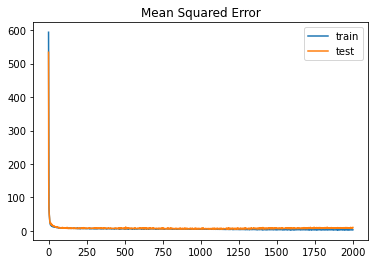

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
# plot feature import
train_mse = mpgmodel.evaluate(train_x, train_y, verbose=0)
test_mse = mpgmodel.evaluate(test_x, test_y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))


# plot loss during training
plt.title('Mean Squared Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [46]:
mpgmodel.save('mpg_car.h5')